In [1]:
import cv2
import glob
import numpy as np
from matplotlib import pyplot as plt

images=glob.glob('camera_cal/calibration*.jpg')

#camera calibration
nx=9
ny=6
objpoints = []
imgpoints = []

objp=np.zeros((nx*ny,3),np.float32)
objp[:,:2]=np.mgrid[0:nx,0:ny].T.reshape(-1,2) #x,y coord
#find points
for fname in images:
    img=cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    if ret==True:
        imgpoints.append(corners)
        objpoints.append(objp)

#calibrate
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

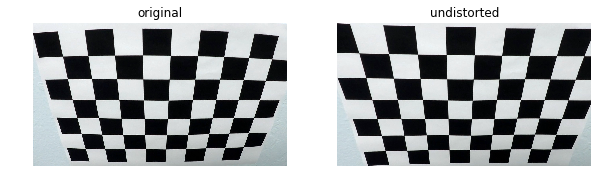

In [2]:
#undistort example - calibration image
img=cv2.imread('camera_cal/calibration2.jpg')
undist = cv2.undistort(img, mtx, dist, None, mtx)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(undist)
plt.axis('off')
plt.title('undistorted')

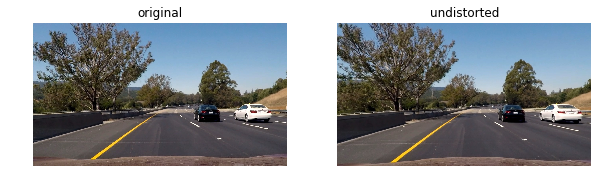

In [3]:
#undistort example images
import matplotlib.image as mpimg
test_images=glob.glob('test_images/straight_lines*.jpg')
test_images+=glob.glob('test_images/test*.jpg')
i=0
for imname in test_images:
    image = mpimg.imread(imname)
    undist = cv2.undistort(image, mtx, dist, None, mtx)
    mpimg.imsave("output"+test_images[i][4:-4]+"_undistort.jpg",undist)
    i+=1
    
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image)
plt.axis('off')
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(undist)
plt.axis('off')
plt.title('undistorted')

In [8]:
# binarization function
def imbinarize(image):
    R = image[:,:,0]
    G = image[:,:,1]
    B = image[:,:,2]
    thresh = (200, 255)
    binary = np.zeros_like(R)
    binary[(R > thresh[0]) & (R <= thresh[1])] = 1
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    thresh = (90, 255)
    binary1 = np.zeros_like(S)
    binary1[(S > thresh[0]) & (S <= thresh[1])] = 1
    binary*=binary1
    return binary

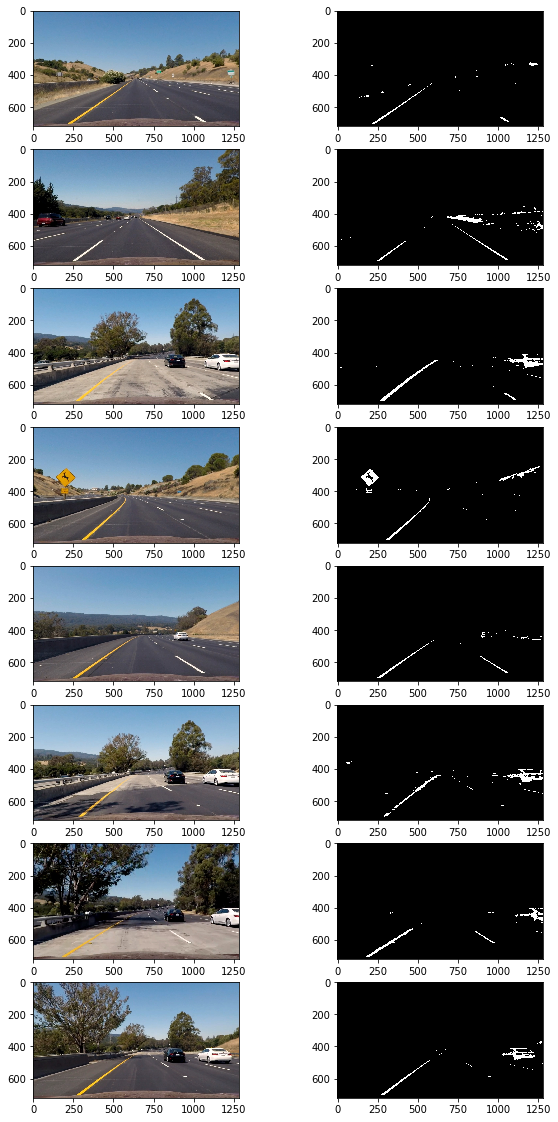

In [9]:
# binarization example
test_images=glob.glob('output_images/straight_lines*_undistort.jpg')
test_images+=glob.glob('output_images/test*_undistort.jpg')
#
plt.figure(figsize=(10,20))
i=0
for imname in test_images:
    image = mpimg.imread(imname)
    binary = imbinarize(image)
    plt.subplot(8,2,i*2+1)
    plt.imshow(image)
    plt.subplot(8,2,i*2+2)
    plt.imshow(binary,cmap='Greys_r')
    #
    mpimg.imsave(test_images[i][:-14]+"binary.jpeg",binary,cmap='Greys_r')
    i+=1

In [36]:
#perspective transform definition
img_size=image.shape
#
src = np.float32(
    [[(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
     [((img_size[0] / 6) - 10), img_size[1]],
     [(img_size[0] * 5 / 6) + 60, img_size[1]],
     [(img_size[0] / 2 + 55), img_size[1] / 2 + 100]])
dst = np.float32(
    [[(img_size[0] / 4), 0],
     [(img_size[0] / 4), img_size[1]],
     [(img_size[0] * 3 / 4), img_size[1]],
     [(img_size[0] * 3 / 4), 0]])
#
M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)

In [37]:
#warper function
def warper(image,M):
    img_size=image.shape[:-1]
    warped = cv2.warpPerspective(image, M, img_size) 
    return warped

In [38]:
#drawlines function
def draw_lines(image,points):
    for i in range(len(points)-1):
        cv2.line(image, tuple(points[i]), tuple(points[i+1]), [255,0,0], 2)

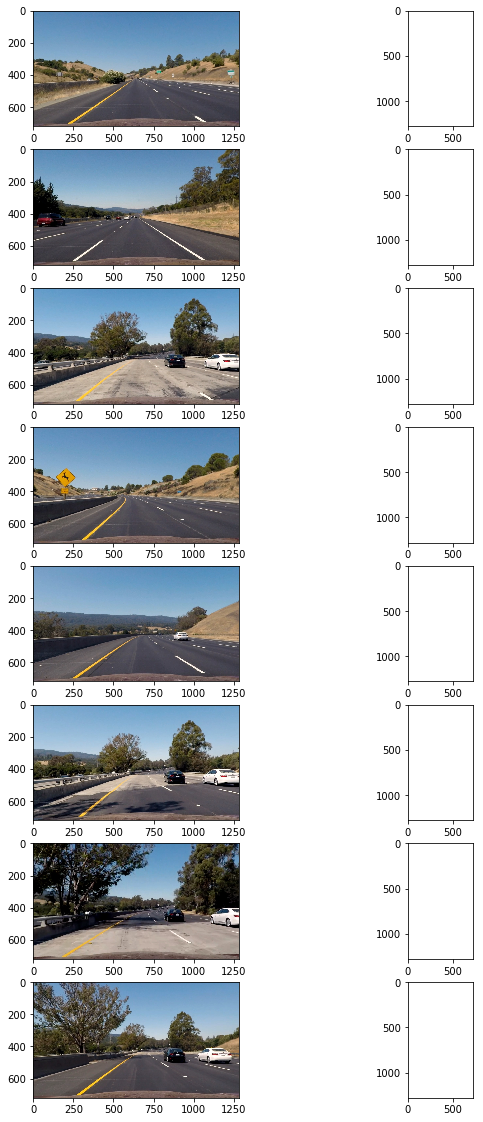

In [39]:
#warper example
test_images=glob.glob('output_images/straight_lines*_undistort.jpg')
test_images+=glob.glob('output_images/test*_undistort.jpg')
plt.figure(figsize=(10,20))
i=0
for imname in test_images:
    image = mpimg.imread(imname)
    warped_image = warper(image,M)
    draw_lines(image,src)
    draw_lines(warped_image,dst)
    plt.subplot(8,2,i*2+1)
    plt.imshow(image)
    plt.subplot(8,2,i*2+2)
    plt.imshow(warped_image)
    #
    #mpimg.imsave(test_images[i][:-14]+"binary.jpeg",binary,cmap='Greys_r')
    i+=1

In [35]:
image.shape

(720, 1280, 4)